In [1]:
### Imports
import pandas as pd
import unidecode
import re
import math
import locale
import matplotlib.pyplot as plt
import numpy as np
import random

### Users cleaning

In [2]:
# Load dataset
users = pd.read_csv('data/users.csv')

# To remove every non-ASCII character
users = users.applymap(lambda x: unidecode.unidecode(x) if isinstance(x, str) else x)

# Convert registration date string to proper year
users['registration_date'] = users['registration_date'].str.replace('Membre Tripadvisor depuis ', '')
users['registration_date'] = users['registration_date'].str.replace('None', '-1')
users['registration_date'] = users['registration_date'].astype(int)

# Convert number-of-comments string int an int value
def format_error(row):
    if 'ville' in row['nb_of_comments']:
        row['nb_of_cities'] = row['nb_of_comments']
        row['nb_of_comments'] = '0'
    if 'vote' in row['nb_of_cities']:
        row['nb_of_comments'] = row['nb_of_cities']
        row['nb_of_cities'] = '0'
    if 'vote' in row['nb_of_comments']:
        row['nb_of_comments'] = row['nb_of_comments'].replace(' votes utiles', '')
        row['nb_of_comments'] = row['nb_of_comments'].replace(' vote utile', '')
    if 'photo' in row['nb_of_cities']:
        row['nb_of_cities'] = '0'
        
    return row

users['nb_of_comments'] = users['nb_of_comments'].str.replace('contributions', '')
users['nb_of_comments'] = users['nb_of_comments'].str.replace('contribution', '')
users['nb_of_comments'] = users['nb_of_comments'].str.replace('None', '0')
users['nb_of_comments'] = users['nb_of_comments'].apply(unidecode.unidecode)
users = users.apply(format_error, axis=1)
users['nb_of_comments'] = users['nb_of_comments'].str.replace(' ', '')
users['nb_of_comments']= users['nb_of_comments'].astype(int)

# Convert the number-of-cities string into an int value
users['nb_of_cities'] = users['nb_of_cities'].str.replace('ville visitee', '')
users['nb_of_cities'] = users['nb_of_cities'].str.replace('villes visitees' ,'')
users['nb_of_cities'] = users['nb_of_cities'].str.replace('None', '0')
users['nb_of_cities'] = users['nb_of_cities'].str.replace(' ', '')
users['nb_of_cities'] = users['nb_of_cities'].astype(int)

users['sex'] = users['sex'].str.replace('homme', 'H')
users['sex'] = users['sex'].str.replace('femme', 'F')

def format_cuisine_occur(cuisines):    
    if isinstance(cuisines, float) and math.isnan(cuisines):
        return {}
    
    cuisines_dict = {}
    pattern = '\d+ +(\w+) +(\d+)'
    matches = re.findall(pattern, cuisines)   
    
    for match in matches:
        if match[0] != 'None':
            cuisines_dict[match[0]] = int(match[1])
    return cuisines_dict

users['top_cuisines'] = users['top_cuisines'].apply(format_cuisine_occur)

users = users[['username', 'registration_date', 'nb_of_comments', 'nb_of_cities', 'age', 'sex', 'country', 'top_cuisines', 'avg_overall_rating', 'avg_cuisine_rating', 'avg_service_rating', 'avg_quality_price_rating', 'avg_mood_rating', 'avg_michelin', 'avg_price_range_estimation']]
users.head()

,username,registration_date,nb_of_comments,nb_of_cities,age,sex,country,top_cuisines,avg_overall_rating,avg_cuisine_rating,avg_service_rating,avg_quality_price_rating,avg_mood_rating,avg_michelin,avg_price_range_estimation
0,nathalieval1972,2021,10,2,None,None,None,"{'Restauration_rapide': 3, 'Francaise': 2, 'Eu...",3.64,2.74,2.67,2.73,0.57,0.0,1.31
1,johanm8,2018,3,3,None,None,None,{},4.50,0.00,0.00,0.00,0.00,0.0,0.00
2,DumasDD,2013,23,14,50-64,H,france,"{'Europeenne': 2, 'Suisse': 1, 'Francaise': 1,...",4.17,2.67,2.50,2.50,1.33,0.0,1.00
3,ernestbenoit74,2016,35,22,None,None,france,"{'Mediterraneenne': 2, 'Italienne': 2, 'Europe...",4.00,2.05,2.05,1.78,1.50,0.0,1.30
4,cerisecherry,2011,64,40,35-49,F,france,"{'Francaise': 10, 'Europeenne': 10, 'Italienne...",4.11,3.90,3.84,3.63,2.18,0.0,1.78


### Restaurants cleaning

In [3]:
restaurants = pd.read_csv('data/restaurants.csv')
restaurants = restaurants.applymap(lambda x: unidecode.unidecode(x) if isinstance(x, str) else x)

relevant_meals = ['Diner', 'Petit dejeuner', 'Dejeuner']

def format_food_details(data, relevant, irrelevant):
    food = data.split(', ')
    filtered_food = [x for x in food if x not in irrelevant]
    if len(relevant) != 0:
        filtered_food = list(set(food).intersection(relevant))
    return filtered_food

restaurants['meal_types'] = restaurants['meal_types'].apply(lambda x : format_food_details(x, relevant_meals, []))
restaurants['cuisines'] = restaurants['cuisines'].apply(lambda x : format_food_details(x, [], ['0', 'None']))
restaurants['veggie'] = restaurants['special_regimes'].str.contains("Vegetariens")
restaurants = restaurants.rename(columns={'restaurant_name': 'name'})
restaurants = restaurants[['name', 'adress', 'city_ranking', 'overall_rating', 'number_of_reviews', 'price_range_estimation', 'veggie', 'meal_types', 'cuisines', 'cuisine_rating', 'service_rating', 'quality_price_rating', 'mood_rating', 'michelin']]
restaurants.head()

,name,adress,city_ranking,overall_rating,number_of_reviews,price_range_estimation,veggie,meal_types,cuisines,cuisine_rating,service_rating,quality_price_rating,mood_rating,michelin
0,Bistro Spatz,"Dorfstrasse 2, Freienstein-Teufen 8427 Suisse",7.0,5.0,12,2,False,"[Dejeuner, Diner, Petit dejeuner]","[Suisse, Europeenne]",5.0,0.0,4.0,0.0,0
1,Wirtshus zum Wyberg,"Oberteufenerstrasse 1, Freienstein-Teufen 8428...",2.0,4.5,66,3,True,"[Dejeuner, Diner]","[Suisse, Europeenne, Europe centrale]",4.5,4.5,4.0,4.0,1
2,Alpengasthof Tibethuette,"Stilfser Joch, 39020, Stelvio Italie",33.0,4.5,3,0,False,[],[Italie du Nord],0.0,0.0,0.0,0.0,0
3,Tibet Hutte,"Passo Stelvio, 39029, Stelvio Italie",21.0,4.0,109,2,True,"[Dejeuner, Diner, Petit dejeuner]","[Italienne, Bar, Europeenne, Pub]",4.0,4.0,3.5,4.5,0
4,Restaurant Gallia,"Gomagoi 18, 39029, Stelvio Italie",18.0,4.5,79,2,True,"[Dejeuner, Diner, Petit dejeuner]","[Internationale, Italienne, Mediterraneenne]",5.0,4.5,4.5,0.0,0


### Reviews cleaning

In [4]:
reviews = pd.read_csv('data/reviews.csv')
def format_username(username):
    if not ', ' in username:
        return username
    words = re.findall('[A-Za-z0-9][^A-Z]*', username)
    return ''.join(words[:-2])

reviews['username'] = reviews['username'].apply(format_username)
locale.setlocale(locale.LC_TIME, 'fr_FR')
reviews['visit_date'] = reviews['visit_date'].str.replace('None', 'janvier 1900')
reviews['review_date'] = reviews['review_date'].str.replace('None', 'janvier 1900')

reviews['review_date'] = pd.to_datetime(reviews['review_date'], format='%d %B %Y')
reviews['visit_date'] = pd.to_datetime(reviews['visit_date'], format='%B %Y')
reviews = reviews[['restaurant_name', 'username', 'rating', 'review_date', 'visit_date']]
reviews.head()

,restaurant_name,username,rating,review_date,visit_date
0,Bistro Spatz,maximiuliana,5,2021-08-19,2021-07-01
1,Bistro Spatz,gedeonberger,5,2022-07-10,2022-07-01
2,Bistro Spatz,Ritschi64,5,2022-06-14,2022-06-01
3,Bistro Spatz,DomeH20,5,2022-02-04,2022-02-01
4,Bistro Spatz,Ritschi64,5,2021-11-03,2021-11-01


### User data exploration

In [5]:
users.head()

,username,registration_date,nb_of_comments,nb_of_cities,age,sex,country,top_cuisines,avg_overall_rating,avg_cuisine_rating,avg_service_rating,avg_quality_price_rating,avg_mood_rating,avg_michelin,avg_price_range_estimation
0,nathalieval1972,2021,10,2,None,None,None,"{'Restauration_rapide': 3, 'Francaise': 2, 'Eu...",3.64,2.74,2.67,2.73,0.57,0.0,1.31
1,johanm8,2018,3,3,None,None,None,{},4.50,0.00,0.00,0.00,0.00,0.0,0.00
2,DumasDD,2013,23,14,50-64,H,france,"{'Europeenne': 2, 'Suisse': 1, 'Francaise': 1,...",4.17,2.67,2.50,2.50,1.33,0.0,1.00
3,ernestbenoit74,2016,35,22,None,None,france,"{'Mediterraneenne': 2, 'Italienne': 2, 'Europe...",4.00,2.05,2.05,1.78,1.50,0.0,1.30
4,cerisecherry,2011,64,40,35-49,F,france,"{'Francaise': 10, 'Europeenne': 10, 'Italienne...",4.11,3.90,3.84,3.63,2.18,0.0,1.78


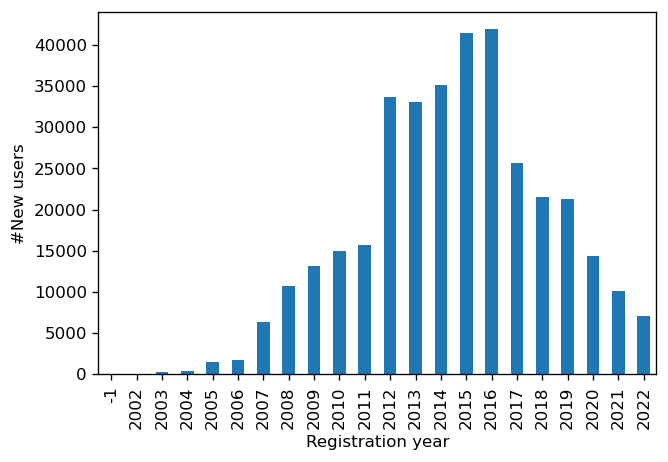

In [6]:
ax = users['registration_date'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Registration year")
ax.set_ylabel("#New users")
ax.figure.set_dpi(120)


In [7]:
stats = users['nb_of_comments'].describe()
none = len(users[users['nb_of_comments'] == 0])

print("In average, users gave {:.1f} comments each, {:.0f} users have not given comments at all, and at most one user gave {:.0f} comments.".format(stats['mean'], none, stats['max']))
print("Also : #comments [25th, 50th, 75th] quartiles are [{:.0f}, {:.0f}, {:.0f}]".format(stats['25%'], stats['50%'], stats['75%']))

In average, users gave 35.2 comments each, 18 users have not given comments at all, and at most one user gave 13605 comments.
Also : #comments [25th, 50th, 75th] quartiles are [2, 8, 32]


In [8]:
stats = users['nb_of_cities'].describe()
none = len(users[users['nb_of_cities'] == 0])

print("In average, a user visited restaurant in {:.1f} cities, {:.0f} users haven't at all and at most one user went in {:.0f} cities.".format(stats['mean'], none, stats['max']))
print("Also : #cities [25th, 50th, 75th] quartiles are [{:.0f}, {:.0f}, {:.0f}]".format(stats['25%'], stats['50%'], stats['75%']))

In average, a user visited restaurant in 39.9 cities, 1437 users haven't at all and at most one user went in 5592 cities.
Also : #cities [25th, 50th, 75th] quartiles are [2, 8, 33]


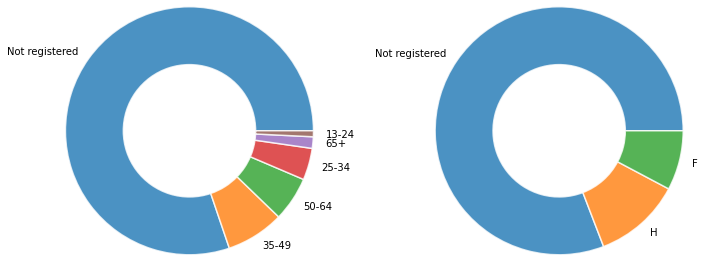

In [9]:
ages_distribution = users['age'].value_counts()
values = ages_distribution.values
values[5] = values[5] + values[6]
values = np.delete(values, 6)
labels_a = ages_distribution.index.values
labels_a[5] = '13-24'
labels_a = np.delete(labels_a, 6)
labels_a[0] = 'Not registered'

sex_distribution = users['sex'].value_counts()
labels_s = sex_distribution.index.values
labels_s[0] = 'Not registered'

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].pie(values, labels=labels_a, radius=1.5, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8})
axes[1].pie(sex_distribution.values, labels=labels_s, radius=1.5, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8})

fig.tight_layout()

The vast majority of users have not registered their age or sex as you can see above.

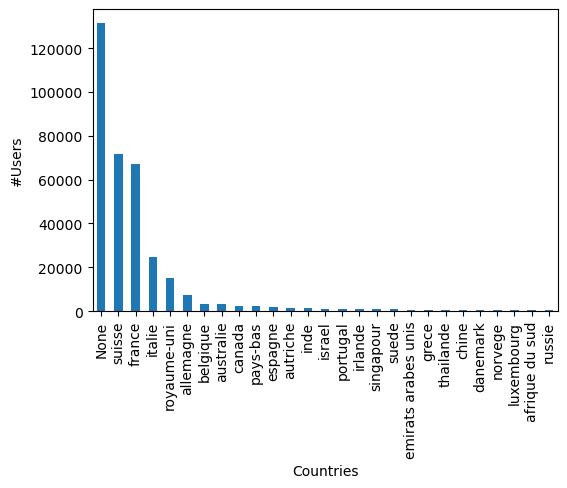

In [10]:
country_distribution = users['country'].value_counts()
ax = country_distribution[country_distribution > 400].plot.bar()
ax.set_xlabel("Countries")
ax.set_ylabel("#Users")
ax.figure.set_dpi(100)

Here, you can see the distribution of user's countries. We removed countries with a low number of users for display issue as there are users from 188 different countries.

### Restaurant data exploration

In [11]:
restaurants.head()

,name,adress,city_ranking,overall_rating,number_of_reviews,price_range_estimation,veggie,meal_types,cuisines,cuisine_rating,service_rating,quality_price_rating,mood_rating,michelin
0,Bistro Spatz,"Dorfstrasse 2, Freienstein-Teufen 8427 Suisse",7.0,5.0,12,2,False,"[Dejeuner, Diner, Petit dejeuner]","[Suisse, Europeenne]",5.0,0.0,4.0,0.0,0
1,Wirtshus zum Wyberg,"Oberteufenerstrasse 1, Freienstein-Teufen 8428...",2.0,4.5,66,3,True,"[Dejeuner, Diner]","[Suisse, Europeenne, Europe centrale]",4.5,4.5,4.0,4.0,1
2,Alpengasthof Tibethuette,"Stilfser Joch, 39020, Stelvio Italie",33.0,4.5,3,0,False,[],[Italie du Nord],0.0,0.0,0.0,0.0,0
3,Tibet Hutte,"Passo Stelvio, 39029, Stelvio Italie",21.0,4.0,109,2,True,"[Dejeuner, Diner, Petit dejeuner]","[Italienne, Bar, Europeenne, Pub]",4.0,4.0,3.5,4.5,0
4,Restaurant Gallia,"Gomagoi 18, 39029, Stelvio Italie",18.0,4.5,79,2,True,"[Dejeuner, Diner, Petit dejeuner]","[Internationale, Italienne, Mediterraneenne]",5.0,4.5,4.5,0.0,0


Text(0.5, 1.0, 'Price category')

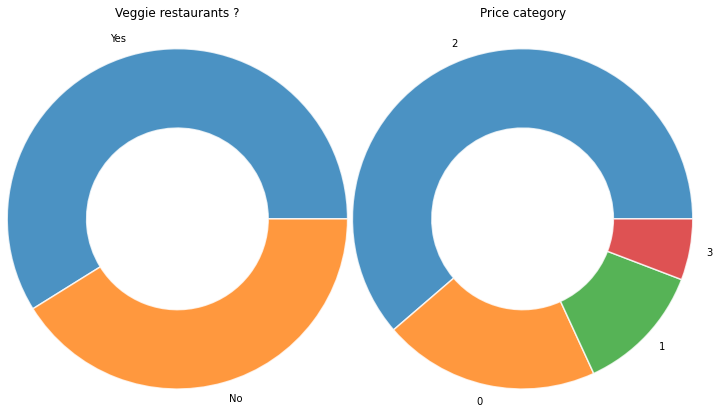

In [12]:
veggie_distribution = restaurants['veggie'].value_counts()
labels_v = ['Yes', 'No']

price_distribution = restaurants['price_range_estimation'].value_counts()
labels_p = price_distribution.index.values

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].pie(veggie_distribution.values, labels=labels_v, radius=1.5, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8})
axes[1].pie(price_distribution.values, labels=labels_p, radius=1.5, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8})
fig.tight_layout()
axes[0].set_title('Veggie restaurants ?', pad=60)
axes[1].set_title('Price category', pad=60)

In [13]:
cuisines_val = restaurants['cuisines'].values
distinct_cuisines = set()
for cuisines in cuisines_val :
    for c in cuisines:
        distinct_cuisines.add(c)
cuisines_sample = random.choices(list(distinct_cuisines),k=3)
print("In total, we have {:.0f} different cuisines. Here are a few : {}".format(len(distinct_cuisines), cuisines_sample))


In total, we have 147 different cuisines. Here are a few : ['Allemande', 'Singapourienne', 'Peruvienne']


In [14]:
stars = restaurants['michelin'].value_counts().values
print('Among the {} restaurants dataset of our dataset, {} have one michelin stars, none have 2 or 3 michelin stars'.format(len(restaurants), stars[1]))

Among the 31643 restaurants dataset of our dataset, 765 have one michelin stars, none have 2 or 3 michelin stars


### Reviews data exploration

In [15]:
reviews.head()

,restaurant_name,username,rating,review_date,visit_date
0,Bistro Spatz,maximiuliana,5,2021-08-19,2021-07-01
1,Bistro Spatz,gedeonberger,5,2022-07-10,2022-07-01
2,Bistro Spatz,Ritschi64,5,2022-06-14,2022-06-01
3,Bistro Spatz,DomeH20,5,2022-02-04,2022-02-01
4,Bistro Spatz,Ritschi64,5,2021-11-03,2021-11-01


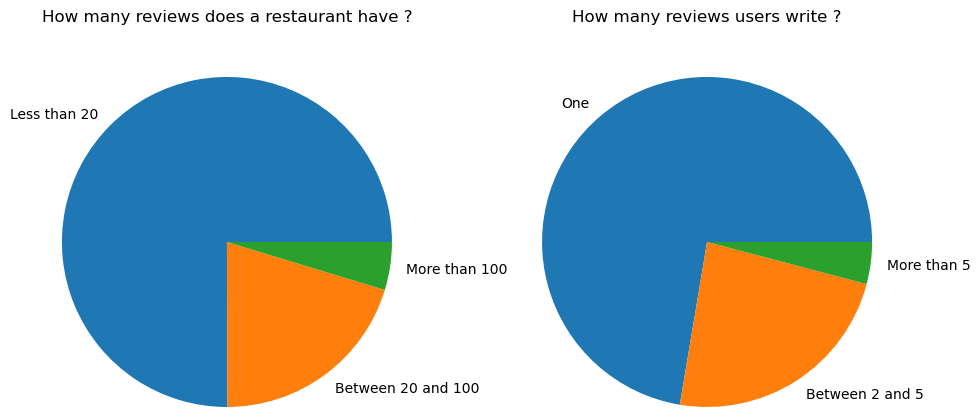

In [16]:
reviews_per_restaurant = reviews['restaurant_name'].value_counts()
bins_r = [
    len(reviews_per_restaurant.loc[lambda x : (x < 20)]),
    len(reviews_per_restaurant.loc[lambda x : (x >= 20) & (x < 100)]),
    len(reviews_per_restaurant.loc[lambda x : (x >= 100)])
]

reviews_per_user = reviews['username'].value_counts()
bins_u = [
    len(reviews_per_user.loc[lambda x : (x == 1)]),
    len(reviews_per_user.loc[lambda x : (x > 1) & (x <=5)]),
    len(reviews_per_user.loc[lambda x : (x > 5)])
]

labels_rpr = ['Less than 20', 'Between 20 and 100', 'More than 100']
labels_rpu = ['One', 'Between 2 and 5', 'More than 5']


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].pie(bins_r, labels=labels_rpr, radius=1.5)
axes[1].pie(bins_u, labels=labels_rpu, radius=1.5)
fig.tight_layout()
axes[0].set_title('How many reviews does a restaurant have ?', pad=60)
axes[1].set_title('How many reviews users write ?', pad=60)
fig.set_dpi(100)

In [17]:
user_username = set(users['username'].values)
review_username = set(reviews['username'].values)
intersection = user_username.intersection(review_username)
print("However, out of {} users from the users dataset, only {} have left a review present in the review dataset.".format(len(user_username), len(intersection)))


However, out of 349764 users from the users dataset, only 246957 have left a review present in the review dataset.


In [18]:
reviews.head()

,restaurant_name,username,rating,review_date,visit_date
0,Bistro Spatz,maximiuliana,5,2021-08-19,2021-07-01
1,Bistro Spatz,gedeonberger,5,2022-07-10,2022-07-01
2,Bistro Spatz,Ritschi64,5,2022-06-14,2022-06-01
3,Bistro Spatz,DomeH20,5,2022-02-04,2022-02-01
4,Bistro Spatz,Ritschi64,5,2021-11-03,2021-11-01


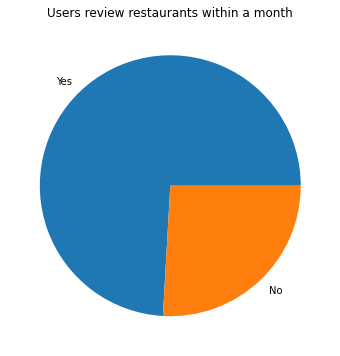

In [19]:
reviews['duration'] = reviews['review_date'] - reviews['visit_date']
reviews['duration'] = reviews['duration'].abs().dt.total_seconds()
reviews['same_month'] = reviews['duration'] <= 30*24*60*60
ax = reviews['same_month'].value_counts().plot.pie(figsize=(6, 6), labels=['Yes', 'No'])
ax.set_title('Users review restaurants within a month')
ax.set_ylabel('')
fig.set_dpi(150)